In [1]:
import math

def distance(a, b):
    return math.hypot(*(v2 - v1 for v1, v2 in zip(a, b)))

def dis(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2 - y1)**2)

In [133]:
import matplotlib.image as img
from tqdm.notebook import tqdm
import numpy as np
from PIL import Image as im 
from PIL import ImageFont
from PIL import ImageDraw 

In [179]:
first_dir = 'cells_2'
micro = 'micro'
cnt = '20'
file_name_base = 'prod_'

file_n = 10


file_name_all = f'./{first_dir}/{micro}/{cnt}' + '/' + file_name_base + str(file_n) + '.jpg'
image = img.imread(file_name_all)
image = np.array(image)

print('================ FILE ', file_n, '===================')
print('Image shape ==', image.shape)
    
points_d = []
points_t = []

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        yellow = np.array([255, 255, 0])
        green = np.array([0, 255, 0])
        h_green = distance(np.array(image[i][j]), green)
        h_purple = distance(np.array(image[i][j]), yellow)
        
        if h_green < 50:
            points_t.append([i, j])
        elif h_purple < 50:
            points_d.append([i, j])

print('Points for target = ', len(points_t), ', Points for diametr = ', len(points_d))
    
nearest_points = []

for i in range(len(points_d)):
    for j in range(i+1, len(points_d)):
        if dis(points_d[i][0], points_d[i][1], points_d[j][0], points_d[j][1]) <= 10:
            nearest_points.append(i)
            
points_d = [points_d[i] for i in range(len(points_d)) if i not in nearest_points]


file_name_2 = file_name_all[:1] + file_name_all[1:].split('.')[0] + '_1.' + file_name_all[1:].split('.')[1]

image_1 = img.imread(file_name_2)
image_1 = np.array(image_1)

print('Image mask shape ==', image_1.shape)
    
points_cell = []
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        green = np.array([0, 255, 0])
        h_green = distance(np.array(image_1[i][j]), green)
        if h_green < 50:
            points_cell.append([i, j])
                
    
print('Mask pixel size = ', len(points_cell))
    
print(f'Diametr {len(points_d)} points = ', points_d)

================ FILE  10 ===================
Image shape == (1178, 1183, 3)
Points for target =  1279 , Points for diametr =  18
Image mask shape == (1178, 1183, 3)
Mask pixel size =  89451
Diametr 4 points =  [[45, 623], [518, 45], [634, 1142], [1130, 567]]


Пористость - 7.74 %, [200, 120, 120], 50



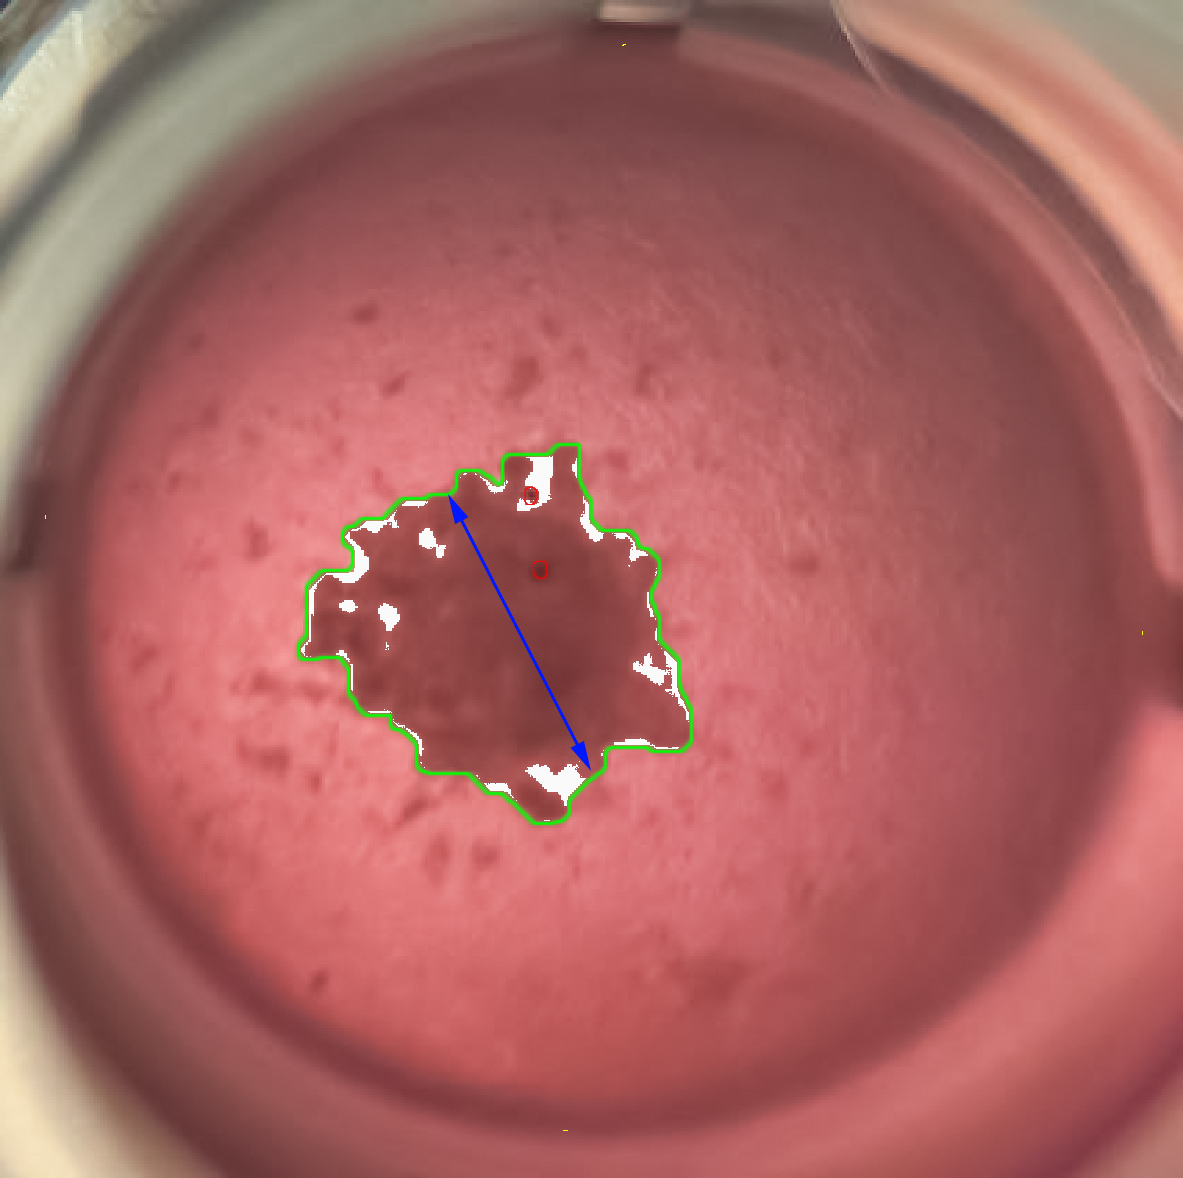

In [183]:
from PIL import Image as im 

image_1 = image.copy()

green = np.array([0, 255, 0])
yellow = np.array([255, 255, 0])
red = np.array([255, 0, 0])
blue = np.array([0, 0, 255])

st_colors = [green, blue]

def check_colors(colors, point):
    for c in colors:
        if distance(c, point) <= 200:
            return True
    return False

cnt = 0

light_array = [200, 120, 120]
light_limit = 50

for i, j in points_cell:
    light = np.array(light_array)
    h_light = distance(np.array(image_1[i][j]), light)
    if (h_light <= light_limit) and not check_colors(st_colors, np.array(image_1[i][j])):
        image_1[i][j] = [250, 250, 250]
        cnt += 1
    else:
        #image_1[i][j] = [255, 255, 255]
        pass

print(f'Пористость - {round(cnt / len(points_cell) * 100, 2)} %, {light_array}, {light_limit}\n')

im.fromarray(image_1)